<b> <h1> Battle of neighborhoods : Toronto, Ontario. </h1> </b>

 <h4>I. <i> Background </i> :</h4> 

Often times, when we make that leap of faith and move to a whole new country, we find ourselves facing the struggles of settling in and finding our way around the new environment.

As far as a business owner is concerned, opening a new business in a new country or area could be challenging since there might be more than one competitor in the same neighborhood.
That is why a good analysis must be conducted in order to figure out the best area to start ones business for it to succeed.

 <h4>II. <i> Business Problem </i> :</h4> 

With that being said, the goal of this project aims to make the process of choosing the best area to open a Dessert Shop easier on the owner, where formalities of looking for the best neighborhood area will be taken care of.

We will indeed extract the list of neighborhoods in Toronto, and analyze the area around each neighborhood to see if it suits the prospective Dessert Shop owner or not.

We will use k-means clustering machine learning clustering algorithm, to cluster the venues based on their category.
At the end of this analysis, we will know which area will be the best suited to start the Dessert Shop business.

 <h4>III. <i> Datasets and APIs used </i> :</h4> 

Datasets :
For the Paris areas, we will scrape the data from this page.
Here is the URL : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M



Foursquare API :
We will be using the Foursquare API to extract the data related to the venues around the neighborhood areas, and merge them to our initial dataset in order to make our analysis.

<b>NB :</b> The Foursquare Places API provides location based experiences with diverse information about venues, users, photos, and check-ins. The API supports real time access to places, Snap-to-Place that assigns users to specific locations, and Geo-tag.

 <h4>IV. <i> Methodology </i> :</h4> 

As far as our methodology is concerned, we will follow these steps for our analysis.

<li>Data Scraping and Data Wrangling.</li>
<li>Data Preprocessing.</li>
<li>Data Clustering.</li>
<li>Data Visualization.</li>

 <h4>Let's begin !</h4> 

We will first need to download our needed <b>libraries</b> and <b>packages</b>.

In [6]:
!pip install beautifulsoup4
!pip install lxml

from bs4 import BeautifulSoup
import requests
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


Great ! 

The next step is <b>Web Scraping</b> to retrieve the data we need.

In [7]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
souptable = soup.find('table', {'class' : 'wikitable sortable'} )
souptable

<table class="wikitable sortable">
<tbody><tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Harbourfront</a>
</td></tr>
<tr>
<td>M6A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Lawrence_Heights" title="Lawrence Heights">Lawrence Heights</a>
</td></tr>
<tr>
<td>M6A</td>
<td><a href="/wiki/North

Let's read the data.

In [8]:
for tr in souptable.find_all('tr'):
    data = (tr.find_all('td'))
    row1 = [i.text for i in data]
    print(row1)

[]
['M1A', 'Not assigned', 'Not assigned\n']
['M2A', 'Not assigned', 'Not assigned\n']
['M3A', 'North York', 'Parkwoods\n']
['M4A', 'North York', 'Victoria Village\n']
['M5A', 'Downtown Toronto', 'Harbourfront\n']
['M6A', 'North York', 'Lawrence Heights\n']
['M6A', 'North York', 'Lawrence Manor\n']
['M7A', "Queen's Park", 'Not assigned\n']
['M8A', 'Not assigned', 'Not assigned\n']
['M9A', 'Downtown Toronto', "Queen's Park\n"]
['M1B', 'Scarborough', 'Rouge\n']
['M1B', 'Scarborough', 'Malvern\n']
['M2B', 'Not assigned', 'Not assigned\n']
['M3B', 'North York', 'Don Mills North\n']
['M4B', 'East York', 'Woodbine Gardens\n']
['M4B', 'East York', 'Parkview Hill\n']
['M5B', 'Downtown Toronto', 'Ryerson\n']
['M5B', 'Downtown Toronto', 'Garden District\n']
['M6B', 'North York', 'Glencairn\n']
['M7B', 'Not assigned', 'Not assigned\n']
['M8B', 'Not assigned', 'Not assigned\n']
['M9B', 'Etobicoke', 'Cloverdale\n']
['M9B', 'Etobicoke', 'Islington\n']
['M9B', 'Etobicoke', 'Martin Grove\n']
['M9B', '

We will now use strip to remove \n

In [9]:
souprows= []
for tr in souptable.find_all('tr'):
    data = tr.find_all('td')
    souprows.append([i.text.strip() for i in data])

In [10]:
souplabels = souptable.find_all('th')
souplabels = [c.text for c in souplabels]
souplabels = [i.strip() for i in souplabels]

Let's insert our scraped data into a panda dataframe for a better reading.

In [11]:
soup_df = pd.DataFrame( data  = souprows , columns = souplabels)
soup_df.head()

,Postcode,Borough,Neighbourhood
0,None,None,None
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


<b>  Data Cleaning and Preprocessing  </b>

We will go ahead now and prepare our dataset for the modeling process.

We will follow these steps :

<li>Dropping the cells with a borough that is "Not assigned".</li>
<li>Group the data by Borough and Postcode</li>
<li>If a cell has a borough but a "Not assigned" neighborhood, then the neighborhood will be the same as the borough.</li>


In [12]:
clean_df = soup_df.drop(0)
clean_df = clean_df[clean_df.Borough != 'Not assigned']
clean_df.head()

,Postcode,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor


In [13]:
clean_df = clean_df.groupby(['Postcode','Borough']).agg(lambda x: ", ".join(x.astype(str))).reset_index()
clean_df.head(10)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [14]:
clean_df.loc[clean_df.Neighbourhood == 'Not assigned', 'Neighbourhood'] = clean_df.Borough
clean_df = clean_df.rename(columns = {"Postcode": "Postal Code"}) 
clean_df.head(10)

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


<b> Downloading the Geospatial data </b>

In [22]:
!wget -q -O 'Geospatial_data.csv' http://cocl.us/Geospatial_data
print ("Data downloaded !")

Data downloaded !


In [15]:
df_geo = pd.read_csv("Geospatial_Coordinates.csv")
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<b>Adding the Longitude and Latitude to our dataframe</b>

In [16]:
df_neigh_latitudelongitude = pd.merge(clean_df, df_geo, on='Postal Code')
df_neigh_latitudelongitude.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


<b> We will now filter the data for Toronto </b>

In [17]:
df_Toronto_neighborhoods = df_neigh_latitudelongitude[df_neigh_latitudelongitude['Borough'].str.contains('Toronto')].reset_index(drop = True)
df_Toronto_neighborhoods.head()   

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


Let's get Toronto's coordinates in order to visualize the map.

In [18]:
address = 'Toronto, Ontario'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Downtown Toronto are 43.653963, -79.387207.


<b>Map of Toronto</b>

In [19]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

folium.CircleMarker([latitude, longitude], radius=10, popup='Downtown Toronto', color='Red', fill=True, fill_color='Red', fill_opacity=0.9,).add_to(map_toronto)

for lat, lng, label in zip(df_Toronto_neighborhoods['Latitude'], df_Toronto_neighborhoods['Longitude'], df_Toronto_neighborhoods['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map_toronto)  
    
map_toronto

<b> We will now use the Foursquare API to explore the neighborhoods in Toronto. </b>

In [20]:
CLIENT_ID = 'UNFR23YQDGANWTHQ1TWBJRXUSV3Y5E4O21MM3AVJHFTK04CP' # your Foursquare ID
CLIENT_SECRET = 'DXST53LGMLVFIHYD43D2LNLFUMGPDHZTQJ2VYV0YKX4MHZUU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UNFR23YQDGANWTHQ1TWBJRXUSV3Y5E4O21MM3AVJHFTK04CP
CLIENT_SECRET:DXST53LGMLVFIHYD43D2LNLFUMGPDHZTQJ2VYV0YKX4MHZUU


Let's get the venues within a 500 radius.

In [21]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e011244aba297001b42395d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 78,
  'suggestedBounds': {'ne': {'lat': 43.6584630045, 'lng': -79.38099903084075},
   'sw': {'lat': 43.649462995499995, 'lng': -79.39341496915925}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          

Okay, so we have many venues around.

<b>Let's identify the categories of these venues first from the foursquare lab, and then store them into a dataframe.</b>

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Cafe Plenty,Café,43.654571,-79.389450
2,Japango,Sushi Restaurant,43.655268,-79.385165
3,Rolltation,Japanese Restaurant,43.654918,-79.387424
4,Sansotei Ramen 三草亭,Ramen Restaurant,43.655157,-79.386501


In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

78 venues were returned by Foursquare.


Let's create a function to get the nearby venues for each specific neighborhood.

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
toronto_venues = getNearbyVenues(names=df_neigh_latitudelongitude['Neighbourhood'],
                                   latitudes=df_neigh_latitudelongitude['Latitude'],
                                   longitudes=df_neigh_latitudelongitude['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [27]:
print(toronto_venues.shape)
toronto_venues.head(100)

(2210, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,RIGHT WAY TO GOLF,43.785177,-79.161108,Golf Course
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
5,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
6,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
7,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center
8,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection
9,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Eggsmart,43.767800,-79.190466,Breakfast Spot


<b>Let's see how many venues per neighborhood there are.</b>

In [28]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",2,2,2,2,2,2
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",8,8,8,8,8,8
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Downsview North, Wilson Heights",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,56,56,56,56,56,56


In [29]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 271 uniques categories.


That's nice ! We have about 272 unique venue categories.

<b>Let's analyze each neighborhood closely.</b>

In [30]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [31]:
toronto_onehot.shape

(2210, 271)

<b>Let's now group rows by neighborhoods and by the mean of the frequency of occurence of each category.</b>

In [32]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.01,0.0,0.03,0.0,0.0,0.0,0.0,0.

In [34]:
toronto_grouped.shape

(100, 271)

<b> We will now print each neighborhood along with the top 5 most common venues </b>

In [35]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
              venue  freq
0       Coffee Shop  0.08
1              Café  0.05
2               Bar  0.04
3        Steakhouse  0.04
4  Sushi Restaurant  0.03


----Agincourt----
                       venue  freq
0  Latin American Restaurant  0.25
1                     Lounge  0.25
2             Sandwich Place  0.25
3             Breakfast Spot  0.25
4                Men's Store  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                venue  freq
0                Park   0.5
1          Playground   0.5
2         Yoga Studio   0.0
3      Medical Center   0.0
4  Miscellaneous Shop   0.0


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                 venue  freq
0        Grocery Store  0.25
1  Fried Chicken Joint  0.12
2             Pharmacy  0.12
3          Pizza Place  0.12
4       Sandwich Place  0.12


----Alderwood, Long Branch----
          venue  fr

<b>Let's put it all in a dataframe for a better reading. And then display the top 10 venues for each neighborhood.</b>

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Bar,Salad Place,Thai Restaurant,Bakery,Restaurant,Sushi Restaurant,Asian Restaurant
1,Agincourt,Latin American Restaurant,Lounge,Breakfast Spot,Sandwich Place,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Playground,Discount Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Women's Store
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Fast Food Restaurant,Beer Store,Pharmacy,Pizza Place,Fried Chicken Joint,Sandwich Place,Discount Store,Department Store,Dessert Shop
4,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Skating Rink,Pub,Gym,Pharmacy,Sandwich Place,Dim Sum Restaurant,Dance Studio,Deli / Bodega


In [38]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted.values == 'Bakery'].count()


Neighborhood              20
1st Most Common Venue     20
2nd Most Common Venue     20
3rd Most Common Venue     20
4th Most Common Venue     20
5th Most Common Venue     20
6th Most Common Venue     20
7th Most Common Venue     20
8th Most Common Venue     20
9th Most Common Venue     20
10th Most Common Venue    20
dtype: int64

<b>As we can see, we have 20 neighborhoods with a bakery as one of the top 10 venues which is quite a lot !</b>

<h4>So for a better analysis, let's see how many bakeries are the top 1 venue in those neighborhoods.</h4>

In [39]:
b1 = neighborhoods_venues_sorted[neighborhoods_venues_sorted['1st Most Common Venue'] == 'Bakery']
b1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


<h4>What about Dessert Shops.</h4>

In [40]:
ds1 = neighborhoods_venues_sorted[neighborhoods_venues_sorted['1st Most Common Venue'] == 'Dessert Shop']
ds1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


Okay Great ! So it seems like there aren't any Dessert Shops as the number one venue.
This is our chance.

Before making a decision; let's first cluster the neighborhoods to have a better understanding.

<b>Clustering the neighborhoods</b>

We will run k-means to cluster the neighborhoods into 5 clusters.

In [41]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

We now create a dataframe that includes the clusters as well as the top venues.

In [42]:
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

toronto_merged = df_neigh_latitudelongitude

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
toronto_merged.head() # check the last columns!


,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3.0,Fast Food Restaurant,Women's Store,Doner Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,4.0,Golf Course,Bar,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Event Space
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Electronics Store,Pizza Place,Breakfast Spot,Intersection,Medical Center,Mexican Restaurant,Rental Car Location,Comfort Food Restaurant,Comic Shop,Drugstore
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,Coffee Shop,Korean Restaurant,Gift Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Caribbean Restaurant,Bakery,Bank,Athletics & Sports,Lounge,Hakka Restaurant,Gas Station,Fried Chicken Joint,Thai Restaurant,Women's Store


<b> Finally let's visualize the resulting clusters </b>

In [43]:
toronto_merged=toronto_merged.dropna()
toronto_merged['Cluster_Labels'] = toronto_merged.Cluster_Labels.astype(int)

In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b> Let's examine the clusters </b>

<h4>Cluster 01</h4>

In [45]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Scarborough,0,Electronics Store,Pizza Place,Breakfast Spot,Intersection,Medical Center,Mexican Restaurant,Rental Car Location,Comfort Food Restaurant,Comic Shop,Drugstore
3,Scarborough,0,Coffee Shop,Korean Restaurant,Gift Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant
4,Scarborough,0,Caribbean Restaurant,Bakery,Bank,Athletics & Sports,Lounge,Hakka Restaurant,Gas Station,Fried Chicken Joint,Thai Restaurant,Women's Store
6,Scarborough,0,Discount Store,Coffee Shop,Department Store,Dance Studio,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
7,Scarborough,0,Bus Line,Fast Food Restaurant,Bakery,Metro Station,Intersection,Park,Soccer Field,Drugstore,Donut Shop,Dumpling Restaurant
8,Scarborough,0,Motel,American Restaurant,Women's Store,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
9,Scarborough,0,Skating Rink,College Stadium,General Entertainment,Café,Women's Store,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
10,Scarborough,0,Indian Restaurant,Chinese Restaurant,Brewery,Vietnamese Restaurant,Pet Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
11,Scarborough,0,Middle Eastern Restaurant,Auto Garage,Sandwich Place,Shopping Mall,Bakery,Breakfast Spot,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
12,Scarborough,0,Latin American Restaurant,Lounge,Breakfast Spot,Sandwich Place,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant


<h4>Cluster 02</h4>

In [46]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,1,Playground,Convenience Store,Women's Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run
14,Scarborough,1,Park,Playground,Discount Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Women's Store
23,North York,1,Park,Convenience Store,Bank,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Dance Studio
25,North York,1,Park,Food & Drink Shop,Construction & Landscaping,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Dance Studio
30,North York,1,Park,Airport,Dog Run,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant
40,East York,1,Park,Metro Station,Convenience Store,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Dance Studio
44,Central Toronto,1,Park,Swim School,Bus Line,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dance Studio,Discount Store
50,Downtown Toronto,1,Park,Playground,Trail,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Eastern European Restaurant,Dog Run,Cupcake Shop
64,Central Toronto,1,Jewelry Store,Trail,Sushi Restaurant,Park,General Entertainment,Cupcake Shop,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
74,York,1,Park,Fast Food Restaurant,Market,Women's Store,General Travel,General Entertainment,Dumpling Restaurant,Drugstore,Donut Shop,Gift Shop


<h4>Cluster 03</h4>

In [47]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,North York,2,Cafeteria,Women's Store,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Dance Studio


<h4>Cluster 04</h4>

In [48]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,3,Fast Food Restaurant,Women's Store,Doner Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop


<h4>Cluster 05</h4>

In [49]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,4,Golf Course,Bar,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Event Space


We will now collect all the venues and will extract the list of all venues in a cluster.

In [67]:
cluster={}
for i in range(6):
    
    cluster["Cluster_"+str(i+1)]=toronto_merged.loc[toronto_merged["Cluster_Labels"]==i][["Borough"]+list(toronto_merged.columns[4:])]


In [70]:
col=['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']
list_venues ={}
# so basically this function will 
# extract all the list venues of a clusters in a single dict
def best_location_shop (dictionary):
    col=['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']
    for key in dictionary:
        lis=[]
        for columnname in col:
            
            vl = dictionary[key][columnname].tolist()
            for li in vl:
                lis.append(li)
                
                
        list_venues[key]= lis   
    return list_venues

In [71]:
best_location_shop(dictionary=cluster)

{'Cluster_1': ['Electronics Store',
  'Coffee Shop',
  'Caribbean Restaurant',
  'Discount Store',
  'Bus Line',
  'Motel',
  'Skating Rink',
  'Indian Restaurant',
  'Middle Eastern Restaurant',
  'Latin American Restaurant',
  'Pizza Place',
  'Chinese Restaurant',
  'Golf Course',
  'Clothing Store',
  'Café',
  'Home Service',
  'Coffee Shop',
  'Coffee Shop',
  'Basketball Court',
  'Asian Restaurant',
  'Coffee Shop',
  'Coffee Shop',
  'Grocery Store',
  'Business Service',
  'Athletics & Sports',
  'Coffee Shop',
  'Pizza Place',
  'Dance Studio',
  'Trail',
  'Coffee Shop',
  'Indian Restaurant',
  'Greek Restaurant',
  'Park',
  'Café',
  'Park',
  'Coffee Shop',
  'Pizza Place',
  'Tennis Court',
  'Pub',
  'Coffee Shop',
  'Coffee Shop',
  'Coffee Shop',
  'Coffee Shop',
  'Café',
  'Coffee Shop',
  'Coffee Shop',
  'Coffee Shop',
  'Coffee Shop',
  'Coffee Shop',
  'Coffee Shop',
  'Sushi Restaurant',
  'Ice Cream Shop',
  'Sandwich Place',
  'Café',
  'Chinese Restaurant'

Now that we extracted the list of venues in each cluster we will find the most value count of each cluster.

In [72]:
df_venues_cluster=[]
top_10_venues_in_cluster={}
for i in range(6):
    df_venues_cluster.append(pd.DataFrame(list_venues[f"Cluster_{i+1}"],columns=["Cluster_Venues"]))
    top_10_venues_in_cluster[f"Cluster_{i+1}_Venues"]=df_venues_cluster[i]["Cluster_Venues"].value_counts().head(15)

Let's go ahead and view the data !

<b>Cluster I</b>

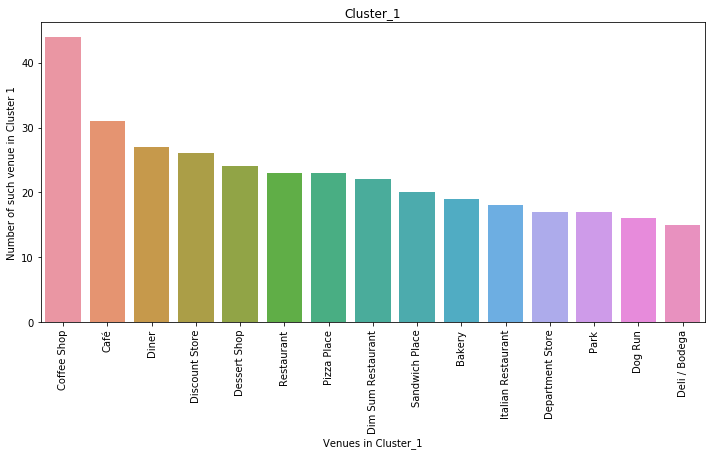

In [84]:
import matplotlib.pyplot as plt 
import seaborn as sns
X=top_10_venues_in_cluster["Cluster_1_Venues"].index
Y=top_10_venues_in_cluster["Cluster_1_Venues"]
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_venues_in_cluster["Cluster_1_Venues"].index,y=top_10_venues_in_cluster["Cluster_1_Venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Venues in Cluster_1")
plt.ylabel("Number of such venue in Cluster 1")
plt.title("Cluster_1")
plt.savefig("Cluster_1.png")

<b>Cluster II</b>

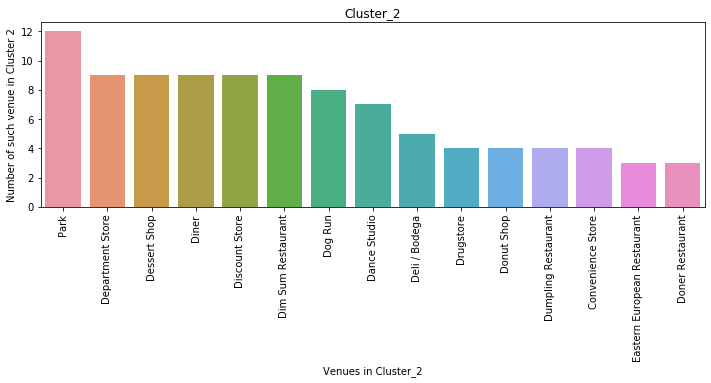

In [83]:
X=top_10_venues_in_cluster["Cluster_2_Venues"].index
Y=top_10_venues_in_cluster["Cluster_2_Venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_venues_in_cluster["Cluster_2_Venues"].index,y=top_10_venues_in_cluster["Cluster_2_Venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Venues in Cluster_2")
plt.ylabel("Number of such venue in Cluster 2")
plt.title("Cluster_2")
plt.savefig("Cluster_2.png")

<b>Cluster III</b>

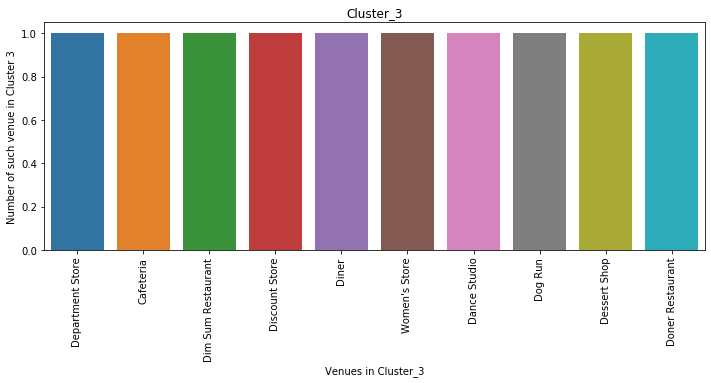

In [82]:
X=top_10_venues_in_cluster["Cluster_3_Venues"].index
Y=top_10_venues_in_cluster["Cluster_3_Venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_venues_in_cluster["Cluster_3_Venues"].index,y=top_10_venues_in_cluster["Cluster_3_Venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Venues in Cluster_3")
plt.ylabel("Number of such venue in Cluster 3")
plt.title("Cluster_3")
plt.savefig("Cluster_3.png")

<b>Cluster IV</b>

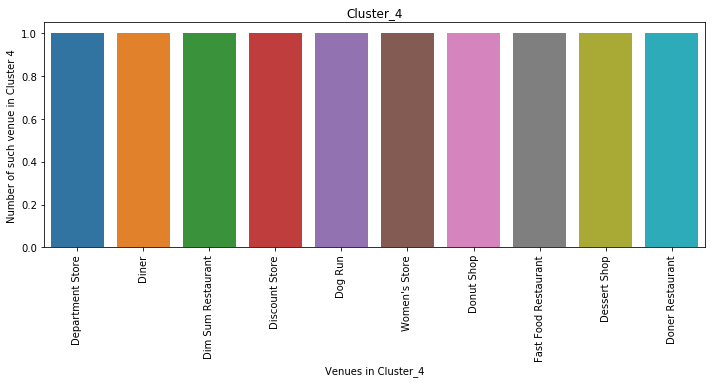

In [80]:
X=top_10_venues_in_cluster["Cluster_4_Venues"].index
Y=top_10_venues_in_cluster["Cluster_4_Venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_venues_in_cluster["Cluster_4_Venues"].index,y=top_10_venues_in_cluster["Cluster_4_Venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Venues in Cluster_4")
plt.ylabel("Number of such venue in Cluster 4")
plt.title("Cluster_4")
plt.savefig("Cluster_4.png")

<b>Cluster V</b>

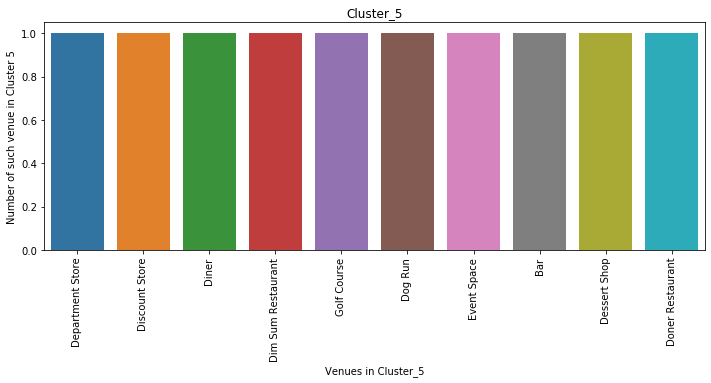

In [81]:
X=top_10_venues_in_cluster["Cluster_5_Venues"].index
Y=top_10_venues_in_cluster["Cluster_5_Venues"]
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_venues_in_cluster["Cluster_5_Venues"].index,y=top_10_venues_in_cluster["Cluster_5_Venues"])
plt.xticks(rotation=90)
plt.tight_layout(h_pad=0,w_pad=0)
plt.xlabel("Venues in Cluster_5")
plt.ylabel("Number of such venue in Cluster 5")
plt.title("Cluster_5")
plt.savefig("Cluster_5.png")

Let's direct our focus on cluster 01 and 02 since they have the most human traffic within them.
The top venues in those clusters are mostly coffee shops. So opening a dessert shop within those areas could be beneficial for the business since there might be a chance of developing business ties with those coffee shops, as well as profiting of the movement in these areas.

Let's see what the recurrent neighborhoods in those two clusters are.

In [96]:
cluster["Cluster_1"]["Borough"].value_counts().argmax()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'North York'

In [102]:
cluster["Cluster_2"]["Borough"].value_counts().argmax()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'North York'

As we can see here, North York seems to be a good location to open a Dessert Shop.

<b> <h2>Results and Discussion section :</h2></b> 

As an end result, we can notice that the cluster 01 and 02 were chosen out of the rest, since they had many coffee shops, bars, restaurants and cafés so there is quite the human traffic around that area, especially in the North York area.

We would suggest as a result opening a Dessert Shop in North York.

<b><h2>Conclusion :</h2></b>

First, we gathered data on Toronto and the various neighborhoods and boroughs from this wikipedia list (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M). 

Moreover, to explore the most popular venues across different neighborhoods, we accessed data through FourSquare API interface and arranged them as a data frame for visualization. By merging data on Toronto neighborhoods and the relative top 10 venues from FourSquare API interface, we were able to recommend profitable location to open a Dessert Shop.

Second, The Methodology section comprised four stages: 1. Collect Data; 2. Explore and Understand Data; 3. Data preparation and preprocessing; 4. Modeling. In particular, in the modeling section, we used the k-means clustering technique as it is fast and efficient in terms of computational cost.

Finally, we drew the conclusion that opening a Dessert Shop around the North York area would be perfect. We indeed analyzed our results according to the five clusters we produced. While Clusters 3, 4 and 5 may not be suitable since there is mainly parks and gardens in those neighborhoods, clusters 1 and 2 would be ideal since they had quite the human traffic with many Coffee shops, bars and restaurants around the area.